# Projet : Prédiction du départ des clients bancaires (Bank Churn)

## 1. Introduction & Objectif

Dans un environnement bancaire de plus en plus concurrentiel, la fidélisation des clients est devenue un enjeu stratégique majeur. Le départ d’un client, appelé "churn", représente une perte financière directe pour la banque et peut indiquer un dysfonctionnement dans la qualité des services proposés.

L’objectif de ce projet est de développer un modèle de machine learning capable de prédire si un client est susceptible de quitter la banque ou non, à partir de ses caractéristiques personnelles et financières. Une telle prédiction permettrait à la banque d’identifier de manière proactive les clients à risque, et de mettre en place des actions ciblées pour les retenir (offres personnalisées, meilleur accompagnement, etc.).

Ce projet couvre l’ensemble de la démarche :
- Exploration et compréhension des données client
- Prétraitement des données
- Entraînement et comparaison de plusieurs modèles de classification
- Évaluation des performances
- Interprétation des résultats dans une perspective métier

Ce travail s’inscrit également dans une démarche d’apprentissage personnel et de constitution de portfolio, avec pour ambition de démontrer mes compétences pratiques en Data Science à travers un cas d’usage concret et pertinent pour le secteur bancaire.

## 2. Chargement des données

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df= pd.read_csv('BankChurners.csv')

In [126]:
pd.set_option('display.max_columns', None)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [127]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## 3. Analyse exploratoire (EDA)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [129]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,8608,9378,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,6,3,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [130]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [131]:
for col in df_cat.columns:
    print(df[col].value_counts())
    print('\n')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Gender
F    5358
M    4769
Name: count, dtype: int64


Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64


Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64


Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64




<Axes: xlabel='Months_Inactive_12_mon', ylabel='count'>

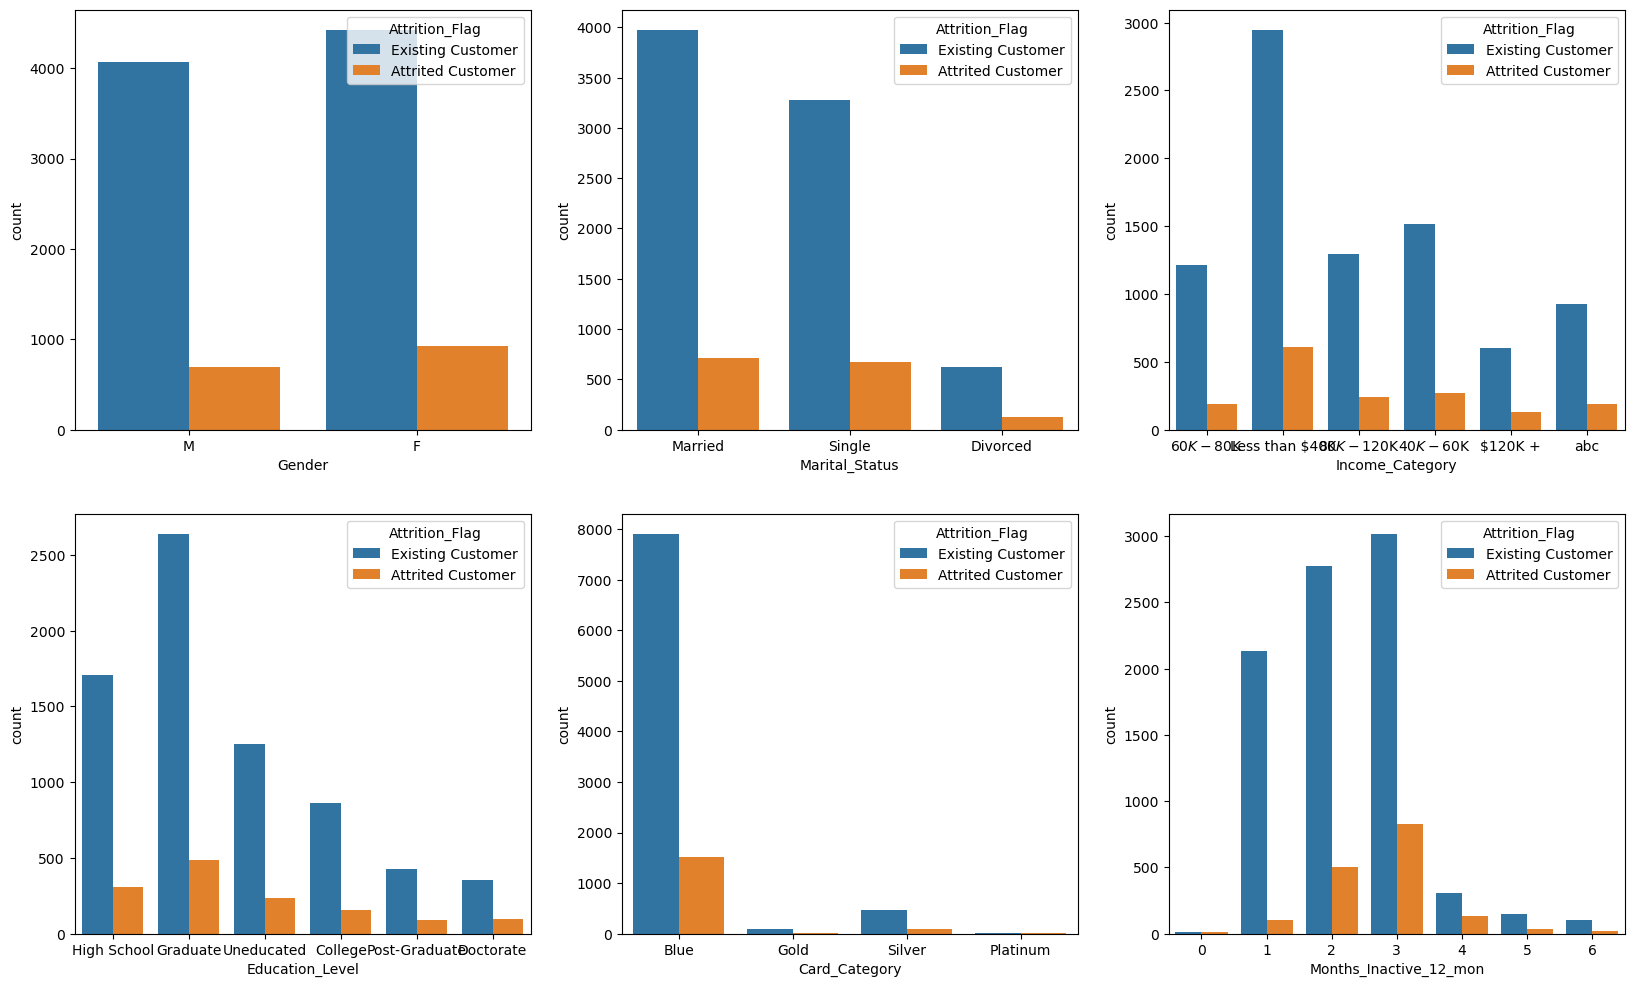

In [132]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')

plt.subplot(2,3,2)
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag')

plt.subplot(2,3,3)
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag')

plt.subplot(2,3,4)
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')

plt.subplot(2,3,5)
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag')

plt.subplot(2,3,6)
sns.countplot(data=df, x='Months_Inactive_12_mon', hue='Attrition_Flag')

In [133]:
pd.crosstab(df['Attrition_Flag'], df['Education_Level'])

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
Attrition_Flag,,,,,,
Attrited Customer,154,95,487,306,92,237
Existing Customer,859,356,2641,1707,424,1250


In [134]:
pd.crosstab(df['Attrition_Flag'], df['Education_Level'], normalize='columns' ).round(3) * 100

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
Attrition_Flag,,,,,,
Attrited Customer,15.2,21.1,15.6,15.2,17.8,15.9
Existing Customer,84.8,78.9,84.4,84.8,82.2,84.1


In [135]:
pd.crosstab(df['Attrition_Flag'], df['Gender'], normalize='index').round(3) * 100

Gender,F,M
Attrition_Flag,,
Attrited Customer,57.2,42.8
Existing Customer,52.1,47.9


In [136]:
pd.crosstab()

TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

In [ ]:
TCD_Month_Inactive = pd.crosstab(df['Attrition_Flag'], df['Months_Inactive_12_mon'], normalize='columns') * 100

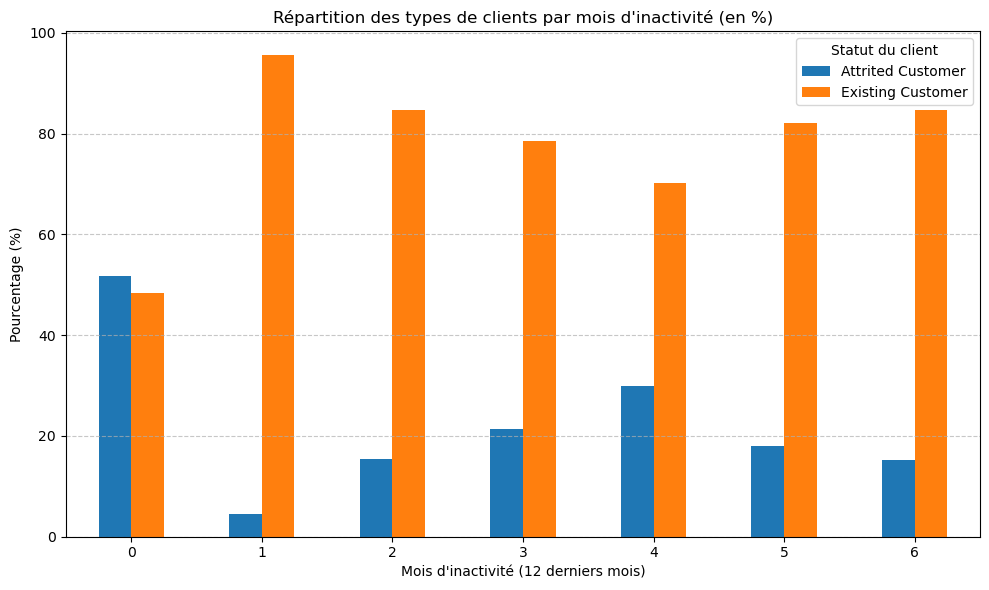

In [ ]:
TCD_Month_Inactive = TCD_Month_Inactive.T
TCD_Month_Inactive.plot(kind='bar', figsize=(10, 6))
plt.title("Répartition des types de clients par mois d'inactivité (en %)")
plt.xlabel("Mois d'inactivité (12 derniers mois)")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Statut du client")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Préparation des données

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
y=df['Attrition_Flag'].map({
    "Existing Customer" : 0,
    "Attrited Customer" : 1
})

## 5. Feature Engennering

### 5.1 Selection des variables numerique

In [ ]:
correlations=df_num.corrwith(y)
X_correle=correlations.abs().sort_values(ascending=False)

In [ ]:
top10 = X_correle.head(10)
top10

Total_Trans_Amt             0.106480
Total_Trans_Ct              0.083627
Total_Amt_Chng_Q4_Q1        0.024913
Total_Revolving_Bal         0.021973
Credit_Limit                0.019656
Customer_Age                0.018239
Months_on_book              0.017606
Avg_Open_To_Buy             0.017485
Total_Relationship_Count    0.014944
Months_Inactive_12_mon      0.012863
dtype: float64

In [ ]:
X_num = df[top10.index]

### 5.2 Selection des variables categorielle (Test CHI2 & ONEHOTENCODER)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

df_categorielle = df[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

#### 5.2.1 Test de chi2 pour voir les variables categorielle plus corele avec y

In [ ]:
#Encodage Label temporaire pour le test de chi2
df_cat_encoded = df_categorielle.copy()
for col in df_cat_encoded.columns:
    df_cat_encoded[col] = LabelEncoder().fit_transform(df_cat_encoded[col])
#Application de test chi2 pour chercher les var categorielle 
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(df_cat_encoded, y)
chi2_scores = pd.Series(selector.scores_, index=df_cat_encoded.columns)
chi2_scores = chi2_scores.sort_values(ascending=False)
print('Chi2 Scores')
chi2_scores

Chi2 Scores


Gender             5.093598
Income_Category    1.624787
Marital_Status     0.597299
Education_Level    0.291196
Card_Category      0.171175
dtype: float64

In [ ]:
best_cat_cols=chi2_scores.head(4).index.tolist()
best_cat_cols

['Gender', 'Income_Category', 'Marital_Status', 'Education_Level']

In [ ]:
X_cat = df[best_cat_cols]

#### 5.2.2 ONEHOTENCODER Pour transformer les variables categorielle 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_cat_encoded_array=encoder.fit_transform(X_cat)
X_cat_encoded= pd.DataFrame(X_cat_encoded_array, 
                            columns=encoder.get_feature_names_out(best_cat_cols), 
                            index=X_cat.index
                            )

#### 5.2.3 Fusion des X_num et X_cat

In [ ]:
X= pd.concat([X_num, X_cat_encoded], axis=1)
X.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Revolving_Bal,Credit_Limit,Customer_Age,Months_on_book,Avg_Open_To_Buy,Total_Relationship_Count,Months_Inactive_12_mon,Gender_M,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Marital_Status_Married,Marital_Status_Single,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated
0,1144,42,1.335,777,12691.0,45,39,11914.0,5,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1291,33,1.541,864,8256.0,49,44,7392.0,6,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1887,20,2.594,0,3418.0,51,36,3418.0,4,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,816,28,2.175,0,4716.0,40,21,4716.0,5,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1088,24,1.376,1247,4010.0,44,36,2763.0,3,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
print(X.shape)
print(y.shape)

(7973, 23)
(7973,)


## 6. Modélisation

### 6.1. Régression Logistique (Hyper-parametre 'class_weight')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log_model=LogisticRegressionCV(cv=5,
    scoring='recall',
    class_weight='balanced',
    max_iter=1000,
    random_state=101)
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000,
                     random_state=101, scoring='recall')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8170426065162907

In [ ]:
y_test[y_test==1].shape

(126,)

In [ ]:
y_pred[y_pred==1].shape

(234,)

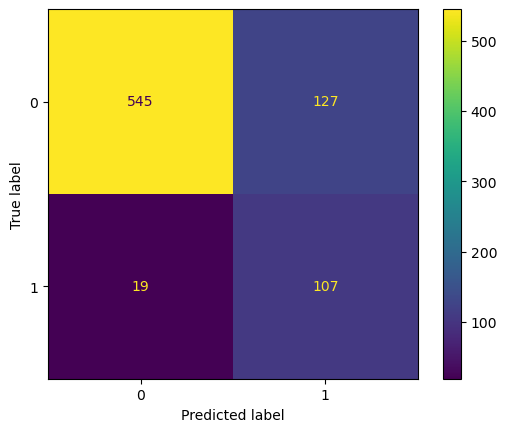

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       672
           1       0.46      0.85      0.59       126

    accuracy                           0.82       798
   macro avg       0.71      0.83      0.74       798
weighted avg       0.89      0.82      0.84       798



### 6.2. Régression Logistique CV

In [ ]:
logcv_model=LogisticRegressionCV()
logcv_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [ ]:
y_pred_logcv = logcv_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_pred_logcv)

0.8759398496240601

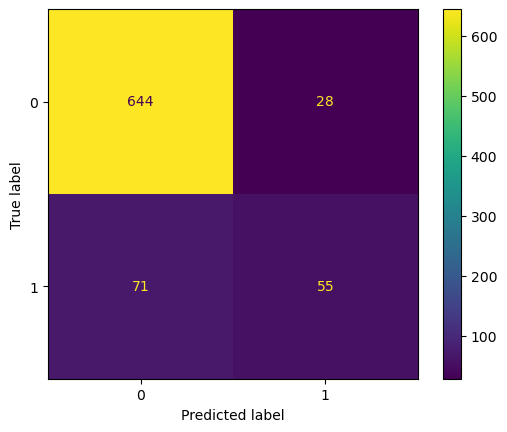

In [ ]:
ConfusionMatrixDisplay.from_estimator(logcv_model,scaled_X_test,y_test);

In [195]:
print(classification_report(y_test,y_pred_logcv))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       672
           1       0.66      0.44      0.53       126

    accuracy                           0.88       798
   macro avg       0.78      0.70      0.73       798
weighted avg       0.86      0.88      0.87       798



### 6.3. KNeighborsClassifier (Methode Elbow)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

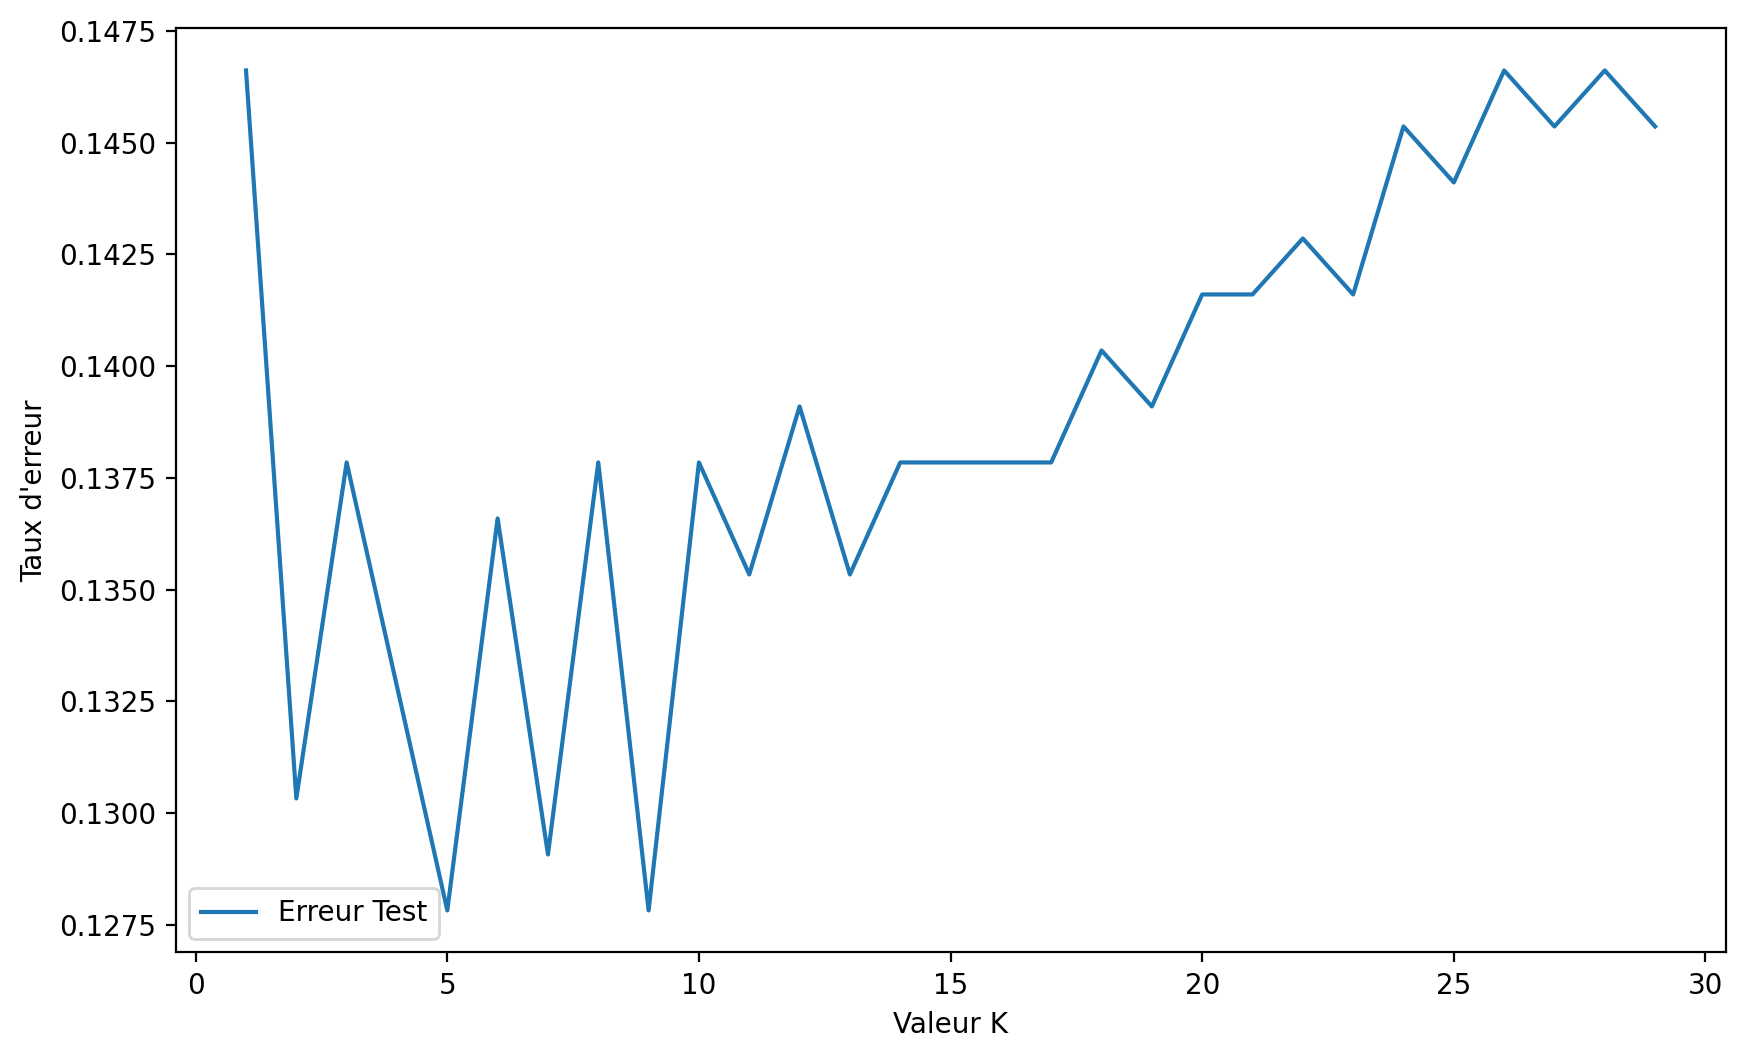

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Erreur Test')
plt.legend()
plt.ylabel("Taux d'erreur")
plt.xlabel("Valeur K");

In [155]:
k_neighbors_model=KNeighborsClassifier(n_neighbors=1)
k_neighbors_model.fit(scaled_X_train,y_train)
y_pred_knn = k_neighbors_model.predict(scaled_X_test)

In [156]:
accuracy_score(y_test,y_pred_knn)

0.8533834586466166

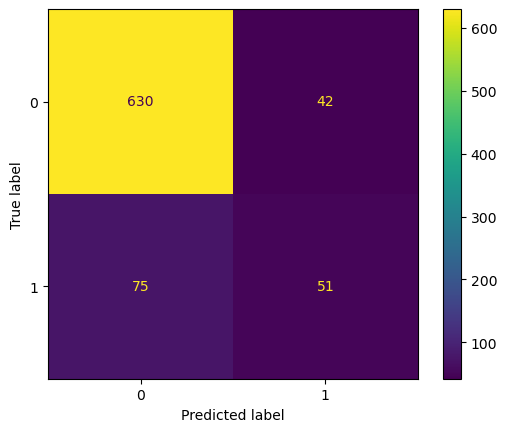

In [157]:
ConfusionMatrixDisplay.from_estimator(k_neighbors_model,scaled_X_test,y_test);

In [158]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       672
           1       0.55      0.40      0.47       126

    accuracy                           0.85       798
   macro avg       0.72      0.67      0.69       798
weighted avg       0.84      0.85      0.84       798



### 6.4. Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [178]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',           # on maximise le F1-score (bon équilibre precision/recall)
    cv=5,                  # validation croisée 5 folds
    n_jobs=-1,             # utilise tous les cœurs CPU dispo
    verbose=1              # affiche la progression
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=1)

In [179]:
print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)

Decision_Tree_model = grid_search.best_estimator_
Decision_Tree_model

Meilleurs hyperparamètres trouvés : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [180]:
y_pred_dtree = Decision_Tree_model.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred_dtree)

0.956140350877193

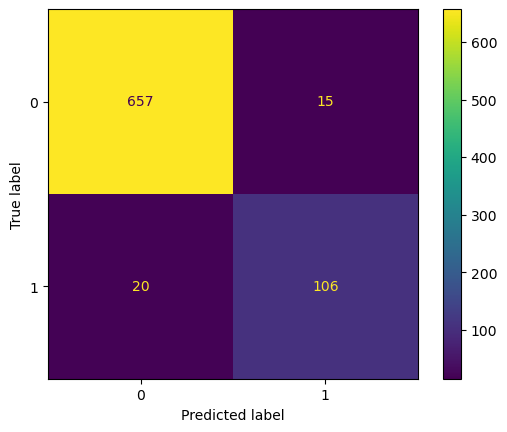

In [182]:
ConfusionMatrixDisplay.from_estimator(Decision_Tree_model,X_test,y_test);

In [196]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       672
           1       0.88      0.84      0.86       126

    accuracy                           0.96       798
   macro avg       0.92      0.91      0.92       798
weighted avg       0.96      0.96      0.96       798



### 6.5. Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',       # optimise le F1-score (bon équilibre precision/recall)
    cv=5,               # validation croisée 5 folds
    n_jobs=-1,          # utilise tous les cœurs CPU disponibles
    verbose=1           # affiche la progression
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [192]:

print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)

randomForest_model = grid_search.best_estimator_

y_pred_randf = randomForest_model.predict(X_test)

print("Rapport de classification (meilleur modèle) :")
print(classification_report(y_test, y_pred_randf))

Meilleurs hyperparamètres trouvés : {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Rapport de classification (meilleur modèle) :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       672
           1       0.94      0.87      0.90       126

    accuracy                           0.97       798
   macro avg       0.96      0.93      0.94       798
weighted avg       0.97      0.97      0.97       798



In [193]:
accuracy_score(y_test,y_pred_randf)

0.9699248120300752

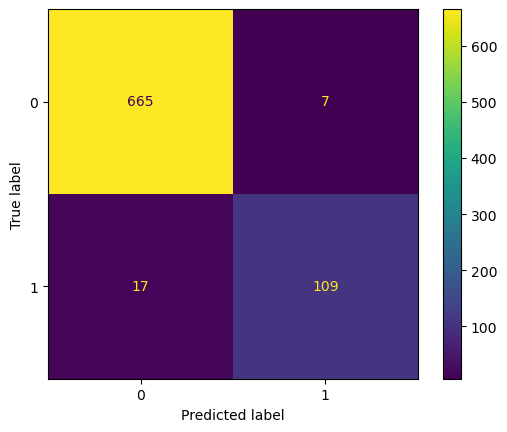

In [194]:
ConfusionMatrixDisplay.from_estimator(randomForest_model,X_test,y_test);

In [197]:
# Récupérer les importances
importances = randomForest_model.feature_importances_

# Créer un DataFrame avec les noms de colonnes et leur importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [199]:
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,Total_Trans_Amt,0.232266
1,Total_Trans_Ct,0.230940
3,Total_Revolving_Bal,0.133117
2,Total_Amt_Chng_Q4_Q1,0.094853
8,Total_Relationship_Count,0.052910
7,Avg_Open_To_Buy,0.050010
4,Credit_Limit,0.043201
5,Customer_Age,0.039786
9,Months_Inactive_12_mon,0.036148
6,Months_on_book,0.031748


C:\Users\user\AppData\Local\Temp\ipykernel_4236\4165970396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette="viridis")


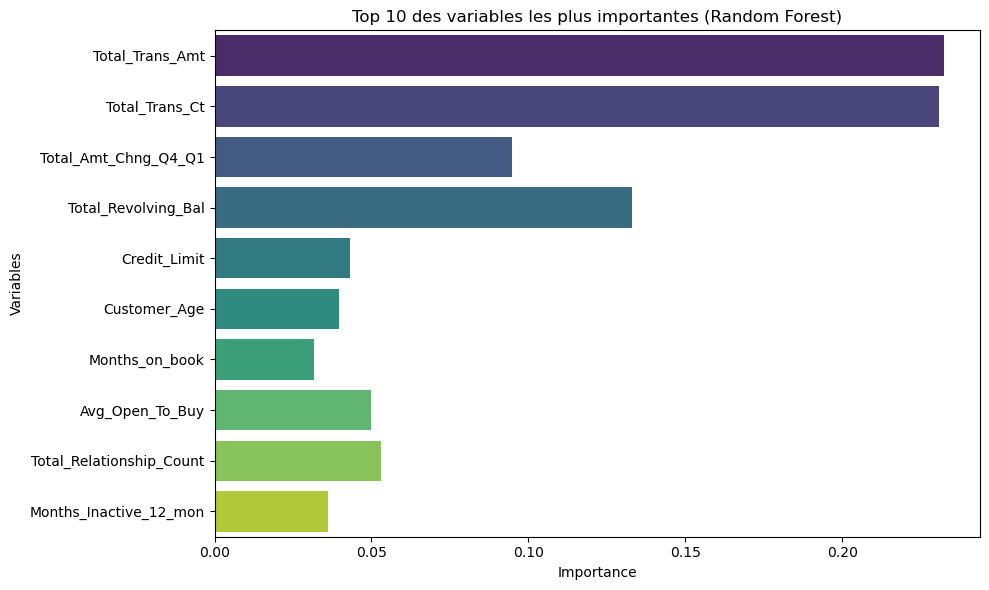

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette="viridis")
plt.title("Top 10 des variables les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

## 7. Interprétation des résultats des modèles

### 7.1 Performances globales des modèles

Le modèle Random Forest affiche une excellente performance pour prédire le churn, avec une accuracy de 97%, une précision de 94% et un rappel de 87% sur la classe des clients à risque. Cela signifie que le modèle est très efficace pour détecter les clients susceptibles de quitter la banque, tout en minimisant les fausses alertes.

| Modèle                   | Accuracy | Précision Classe 1 (Churn) | Rappel Classe 1 (Churn) | F1-score Classe 1 (Churn) |
| ------------------------ | -------- | -------------------------- | ----------------------- | ------------------------- |
| Régression Logistique CV | 82%      | 46%                        | 85%                     | 59%                       |
| K-Nearest Neighbors      | 88%      | 66%                        | 44%                     | 53%                       |
| Decision Tree            | 96%      | 88%                        | 84%                     | 86%                       |
| Random Forest            | 97%      | 94%                        | 87%                     | 90%                       |


Accuracy mesure la proportion de bonnes prédictions globales, mais peut être trompeuse en cas de classes déséquilibrées (ici, peu de churners).

Précision sur la classe churn (1) indique la proportion de clients prédits churners qui le sont vraiment (fausses alertes limitées).

Rappel sur la classe churn (1) montre la capacité du modèle à détecter les churners (sensibilité).

F1-score combine précision et rappel pour un équilibre.

### 7.2 Analyse des modèles

. Régression Logistique CV
Modèle simple et rapide à entraîner.

        Rappel élevé (85%) : il détecte bien la majorité des churners.

        Précision faible (46%) : beaucoup de faux positifs, ce qui peut entraîner un gaspillage des ressources de relance.

        Accuracy modérée (82%).

. K-Nearest Neighbors
        Accuracy correcte (88%), mais faibles rappel (44%) et F1-score (53%) pour les churners.

        Moins adapté pour ce jeu de données déséquilibré et les caractéristiques continues.

. Decision Tree
        Très bonne accuracy (96%) et bon équilibre entre précision (88%) et rappel (84%).

        Modèle interprétable, permet de comprendre les règles derrière les prédictions.

        Toutefois, peut parfois sur-ajuster sans réglage approfondi.

. Random Forest
        Meilleure performance globale avec une accuracy de 97%.

        Excellente précision (94%) et rappel (87%) sur la classe churn.

        Modèle robuste et stable grâce à l’agrégation d’arbres, réduit le sur-apprentissage.

### 7.3. Analyse des variables les plus influentes

| Rang | Variable                   | Importance |
| ---- | -------------------------- | ---------- |
| 1    | Total\_Trans\_Amt          | 23.23%     |
| 2    | Total\_Trans\_Ct           | 23.09%     |
| 3    | Total\_Revolving\_Bal      | 13.31%     |
| 4    | Total\_Amt\_Chng\_Q4\_Q1   | 9.49%      |
| 5    | Total\_Relationship\_Count | 5.29%      |
| 6    | Avg\_Open\_To\_Buy         | 5.00%      |
| 7    | Credit\_Limit              | 4.32%      |
| 8    | Customer\_Age              | 3.98%      |
| 9    | Months\_Inactive\_12\_mon  | 3.61%      |
| 10   | Months\_on\_book           | 3.17%      |


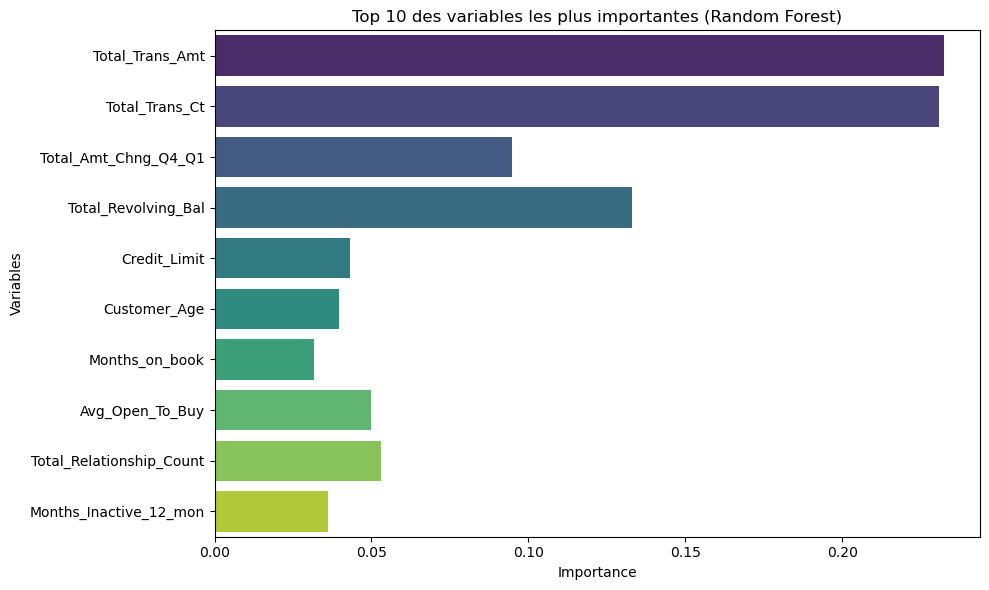

In [203]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), 
            hue='Feature', palette="viridis", dodge=False, legend=False)
plt.title("Top 10 des variables les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

### 7.4. Implications Metiers

Les clients avec un faible montant et nombre de transactions sont plus susceptibles de partir, signalant un désengagement.

Les fluctuations du solde renouvelable et des montants trimestriels indiquent une instabilité financière qui précède souvent le churn.

Le nombre de produits détenus et le crédit disponible influencent aussi fortement la fidélité.

La détection précoce via ces variables permet de cibler efficacement les campagnes de fidélisation.

### 7.5. Recommandations

Prioriser les relances auprès des clients à faible activité transactionnelle.

Proposer des offres adaptées aux clients avec une baisse d’utilisation ou instabilité financière.

Encourager la diversification des produits détenus.

Surveiller l’inactivité prolongée pour réactiver les clients à risque.

Personnaliser la communication en tenant compte de l’âge et de l’ancienneté.

## 8. Preparation du streamlit

In [205]:
import joblib

# Sauvegarder le modèle RandomForest
#joblib.dump(randomForest_model, 'random_forest_model.pkl')

# Sauvegarder le scaler
#joblib.dump(scaler, 'scaler.pkl')

# Sauvegarder l’encoder
#joblib.dump(encoder, 'encoder.pkl')

In [ ]:
# Sauvegarde des noms de colonnes finales utilisées dans X
#joblib.dump(X.columns.tolist(), "columns_model.pkl")

['columns_model.pkl']

In [211]:
X.columns

Index(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Credit_Limit', 'Customer_Age', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Gender_M', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_abc',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated'],
      dtype='object')